<a href="https://colab.research.google.com/github/augustoberwaldt/mackenzie/blob/main/trilha2Augusto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as dependecias
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

**Metodo que busca os documentos html via protocolo http**

In [2]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df

**Buscando dados** www.basketball-reference.com  NBA

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [4]:
#pequena limpeza dos dados
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela


In [5]:
# Outra coisa que tem que ser feita é converter os valores que
# representam números na tabela, pois quando o Panda pega a tabela do HTML, todos os dados são lidos como objetos.
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)


**Plotando grafico de Barras**

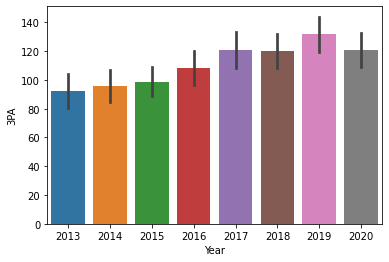

In [9]:
sns.barplot(x='Year', y='3PA', data= sorted_df[['Player', '3PA', 'Year']])
plt.show()

   Year          Rk        Age  ...        TOV         PF         PTS
0  2013  231.387528  26.639198  ...  62.592428  90.091314  437.581292
1  2014  236.085062  26.497925  ...  62.022822  91.304979  445.603734
2  2015  256.573643  26.503876  ...  59.521318  88.866279  428.705426
3  2016  238.610132  26.830396  ...  63.861233  93.354626  467.638767
4  2017  241.914530  26.536325  ...  58.523504  88.762821  458.083333

[5 rows x 28 columns]


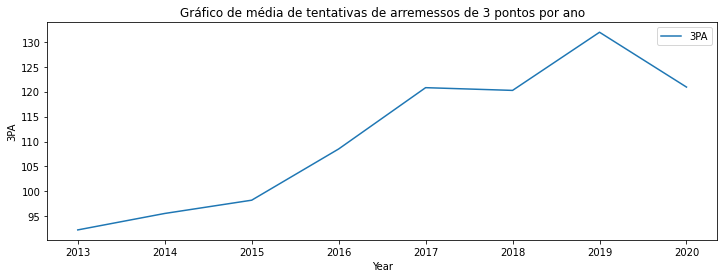

In [10]:
plt.figure(figsize=(12,4))

grouped_data =  df.groupby('Year', as_index= False).mean()
grouped_data.reindex(columns=['Player', '3PA', 'Year'])
print(grouped_data.head())

sns.lineplot(data= grouped_data, x= 'Year', y = '3PA', label= "3PA")
plt.title('Gráfico de média de tentativas de arremessos de 3 pontos por ano')
plt.show()